# **Computational Methods**
## **Introduction to Python**

Written by Niv Keren, nivkeren1@mail.tau.ac.il 

Based on [Python Numpy Tutorial](https://cs231n.github.io/python-numpy-tutorial/)  by Justin Johnson,
from Stanford CS231n class.

*Computational Methods* class: 0341-2300

2020/Semester I; Tuesdays 14:00-16:00

FACULTY OF EXACT SCIENCES | GEOPHYSICS & PLANETARY SCIENCES  
Tel Aviv University

---

In this class we will be using **python 3.7**.\
[python installation guide](https://realpython.com/installing-python/), or you can install through [anaconda](https://www.anaconda.com/distribution/)

The classes will be tought using [jupyter Lab](https://jupyterlab.readthedocs.io/en/stable/index.html) notebooks.\
You can work with any IDE (Integrated development environment) you wish. [PyCharm](https://www.jetbrains.com/pycharm/) is an easy and convenient one. [Getting Started with Pycharm](https://www.youtube.com/watch?v=BPC-bGdBSM8&list=PLQ176FUIyIUZ1mwB-uImQE-gmkwzjNLjP)

---

In [1]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
# plt.rcParams["figure.figsize"] = 12.8, 9.6

%matplotlib

Using matplotlib backend: TkAgg


In [7]:
ax = plt.axes(projection='3d')
def LoG(x, y, sigma):
    temp = (x ** 2 + y ** 2) / (2 * sigma ** 2)
    return -1 / (np.pi * sigma ** 4) * (1 - temp) * np.exp(-temp)

N = 49
half_N = N // 2
X2, Y2 = np.meshgrid(range(N), range(N))
Z2 = -LoG(X2 - half_N, Y2 - half_N, sigma=8)
X1 = np.reshape(X2, -1)
Y1 = np.reshape(Y2, -1)
Z1 = np.reshape(Z2, -1)
ax = plt.axes(projection='3d')
fig = ax.plot_wireframe(X2, Y2, Z2, color='r')
plt.show()

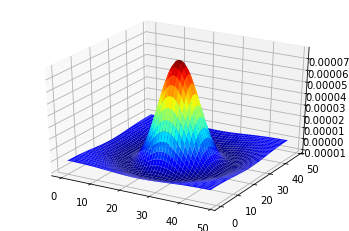

In [176]:
ax = plt.axes(projection='3d')
ax.plot_surface(X2, Y2, Z2, cmap='jet')

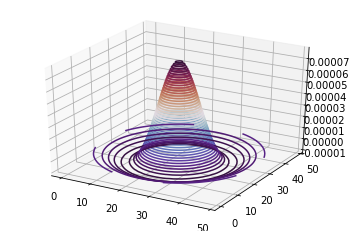

In [162]:
ax = plt.axes(projection='3d')
ax.contour3D(X2, Y2, Z2, 55, cmap='twilight_shifted')

In [2]:
def read_obj(filename):
    triangles = []
    vertices = []
    with open(filename) as file:
        for line in file:
            components = line.strip(' \n').split(' ')
            if components[0] == "f": # face data
                # e.g. "f 1/1/1/ 2/2/2 3/3/3 4/4/4 ..."
                indices = list(map(lambda c: int(c.split('/')[0]) - 1, components[1:]))
                for i in range(0, len(indices) - 2):
                    triangles.append(indices[i: i+3])
            elif components[0] == "v": # vertex data
                # e.g. "v  30.2180 89.5757 -76.8089"
                vertex = list(map(lambda c: float(c), components[1:]))
                vertices.append(vertex)
    return np.array(vertices), np.array(triangles)
            

vertices, triangles = read_obj('/home/nivkeren/Downloads/teapot.obj')
x = vertices[:,0]
y = vertices[:,1]
z = vertices[:,2]
ax = plt.axes(projection='3d')
ax.set_xlim([-3, 3])
ax.set_ylim([-3, 3])
ax.set_zlim([0, 3])
ax.plot_trisurf(x, z, triangles, y, shade=True, color='white')
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '/home/nivkeren/Downloads/teapot.obj'

## **Basic data types**
Like most languages, Python has a number of basic types including:  
*integers, floats, booleans, and strings.*  
These data types behave similar to other programing languages.

### **int (integer)**

In [80]:
x = 3
print(x)
print(type(x))

3
<class 'int'>


In [81]:
print("x + 1 =", x + 1)     # Addition; prints "4"
print("x - 1 =", x - 1)     # Subtraction; prints "2"
print("x * 2 =", x * 2)     # Multiplication; prints "6"
print("x / 2 =", x / 2)     # Multiplication; prints "1.5"
print("x // 2 =", x // 2)   # Multiplication; prints "1"
print("x ** 2 =", x ** 2)   # Exponentiation; prints "9"
x += 1
print("after executing: x += 1")
print("x =", x)             # Prints "4"
x *= 2
print("after executing: x *= 2")
print("x =", x)             # Prints "8"

x + 1 = 4
x - 1 = 2
x * 2 = 6
x / 2 = 1.5
x // 2 = 1
x ** 2 = 9
after executing: x += 1
x = 4
after executing: x *= 2
x = 8


### **float**

In [128]:
x = 2.5
print(x)
print(type(x))
print("x + 1 =", x + 1)   
print("x - 1 =", x - 1)   
print("x * 2 =", x * 2)
print("x / 2 =", x / 2)  
print("x // 2 =", x // 2)
print("x ** 2 =", x ** 2) 

2.5
<class 'float'>
x + 1 = 3.5
x - 1 = 1.5
x * 2 = 5.0
x / 2 = 1.25
x // 2 = 1.0
x ** 2 = 6.25


### **bool (Boolean)**

In [129]:
t = True
f = False
print(type(t)) # Prints "<class 'bool'>"
print("t and f -> ", t and f) # Logical AND; prints "False"
print("t or f  -> ", t or f)  # Logical OR; prints "True"
print("not t   -> ", not t)   # Logical NOT; prints "False"
print("t != f  -> ", t != f)  # Logical XOR; prints "True"

<class 'bool'>
t and f ->  False
t or f  ->  True
not t   ->  False
t != f  ->  True


### **str (String)**

In [82]:
hello = 'hello'                 # String literals can use single quotes
world = "world"                 # or double quotes; it does not matter.
print(type(hello), type(world))

<class 'str'> <class 'str'>


In [83]:
print(hello)                    # Prints "hello"
print(len(hello))               # String length; prints "5"

hello
5


In [85]:
hw = hello + ' ' + world        # String concatenation
print(hw)                       # prints "hello world"

hello world


In [86]:
hw12 = f'{hello}-{world} 12'    # sprintf style string formatting
print(hw12)                     # prints "hello-world 12"

hello-world 12


In [88]:
s = "hello"
print(s.capitalize())  # Capitalize a string; prints "Hello"
print(s.upper())       # Convert a string to uppercase; prints "HELLO"
print(s.replace('l', '(ell)'))  # Replace all instances of one substring with another;
                                # prints "he(ell)(ell)o"
print('  world '.strip())  # Strip leading and trailing whitespace; prints "world"

Hello
HELLO
he(ell)(ell)o
world


### **Casting**
A cast is a way of explicitly informing the compiler that you intend to make the conversion

In [11]:
x = 1  
y = 2.8
z = "3.9"
print(int(x))
print(str(y))
print(float(z))

1
2.8
3.9


In [15]:
b = bool(x)
i = int(y)
print(b)
print(i)

True
2


---

### **tuple / list**

In [131]:
lst = [1, 2, 3, 4, 5]
print(type(lst))
print(lst)

<class 'list'>
[1, 2, 3, 4, 5]


A tuple is an (immutable) ordered list of values. A tuple is in many ways similar to a list.

In [132]:
tup = (1, 2, 3, 4, 5)
print(type(tup))
print(tup)

<class 'tuple'>
(1, 2, 3, 4, 5)


In [133]:
lst[0]

1

In [134]:
tup[0]

1

In [135]:
lst[0] = 'foo'
lst

['foo', 2, 3, 4, 5]

In [136]:
tup[0] = 10
tup

TypeError: 'tuple' object does not support item assignment

## **Dictionaries**
A dictionary stores (key, value) pairs. You can use it like this:

In [90]:
d = {'cat': 'cute', 'dog': 'furry'}  # Create a new dictionary with some data

In [91]:
print(d['cat'])       # Get an entry from a dictionary; prints "cute"
print('cat' in d)     # Check if a dictionary has a given key; prints "True"

cute
True


In [92]:
d['fish'] = 'wet'     # Set an entry in a dictionary
print(d['fish'])      # Prints "wet"

wet


In [94]:
print(d['monkey'])  # KeyError: 'monkey' not a key of d

KeyError: 'monkey'

In [95]:
print(d.get('monkey', 'N/A'))  # Get an element with a default; prints "N/A"
print(d.get('fish', 'N/A'))    # Get an element with a default; prints "wet"

N/A
wet


In [96]:
del d['fish']         # Remove an element from a dictionary
print(d.get('fish', 'N/A')) # "fish" is no longer a key; prints "N/A"

N/A


---

## **If Statements and Loops**

### **If Statements**

In [3]:
if True:
    print("statement is true")
else:
    print("statement is false")

statement is true


In [4]:
x = False
if x:
    print("statement is true")
else:
    print("statement is false")

statement is false


In [5]:
x = 0
if x == 0:
    print("statement is true")
else:
    print("statement is false")

statement is true


In [7]:
x = 1
if x:
    print("statement is true")
else:
    print("statement is false")

statement is true


In [8]:
x = 0
if x:
    print("statement is true")
else:
    print("statement is false")

statement is false


### **For loops**

over index

In [137]:
animals = ['cat', 'dog', 'monkey']
for i in range(len(animals)):
    print("#", i, ":", animals[i])

# 0 : cat
# 1 : dog
# 2 : monkey


iterate over members of list

In [138]:
for animal in animals:
    print(animal)

cat
dog
monkey


In [117]:
for idx, animal in enumerate(animals):
    print(f"#{idx + 1}: {animal}")

#1: cat
#2: dog
#3: monkey


In [139]:
nums = [0, 1, 2, 3, 4]
squares = []
for x in nums:
    squares.append(x ** 2)
print(squares)   # Prints [0, 1, 4, 9, 16]

[0, 1, 4, 9, 16]


In [140]:
nums = [0, 1, 2, 3, 4]
squares = [x ** 2 for x in nums]
print(squares)   # Prints [0, 1, 4, 9, 16]

[0, 1, 4, 9, 16]


In [141]:
nums = [0, 1, 2, 3, 4]
even_squares = [x ** 2 for x in nums if x % 2 == 0]
print(even_squares)  # Prints "[0, 4, 16]"

[0, 4, 16]


---
### **while loops**

infinite loop / endless loop

In [144]:
x = 0
while x < 5:
    print(x)

0
1
2
3
4


In [145]:
x = 0
while x < 5:
    print(x)
    x += 1

0
1
2
3
4


## **Functions**

In [147]:
def sign(x):
    """
    Returns whether the input number is positive, negative or zero.
    Args:
        x (int, float): the inpt number
    Returns:
        str: the sipn of the input number
    """
    if x > 0:
        output = 'positive'
    elif x < 0:
        output = 'negative'
    else:
        output = 'zero'
    return output

In [148]:
sign(42)

'positive'

## **Classes**
create an object type

In [149]:
class Greeter(object):
    
    # Constructor
    def __init__(self, name):
        self.name = name  # Create an instance variable

    # Instance method
    def greet(self, loud=False):
        if loud:
            print('HELLO, %s!' % self.name.upper())
        else:
            print('Hello, %s' % self.name)
            

In [150]:
g = Greeter('Bob')  # Construct an instance of the Greeter class
g.greet()            # Call an instance method; prints "Hello, Fred"
g.greet(loud=True)   # Call an instance method; prints "HELLO, FRED!"

Hello, Bob
HELLO, BOB!


---

## **NumPy**

NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays. The ancestor of NumPy, Numeric, was originally created by Jim Hugunin with contributions from several other developers. In 2005, Travis Oliphant created NumPy by incorporating features of the competing Numarray into Numeric, with extensive modifications. NumPy is open-source software and has many contributors. [(from wikipedia)](https://en.wikipedia.org/wiki/NumPy)

NumPy is the fundamental package for scientific computing with Python. It contains among other things:

* a powerful N-dimensional array object

* sophisticated (broadcasting) functions

* tools for integrating C/C++ and Fortran code

* useful linear algebra, Fourier transform, and random number capabilities

Besides its obvious scientific uses, NumPy can also be used as an efficient multi-dimensional container of generic data. Arbitrary data-types can be defined. This allows NumPy to seamlessly and speedily integrate with a wide variety of databases.
[documentation](https://docs.scipy.org/doc/numpy/index.html)

In [76]:
import numpy as np

We can initialize numpy arrays from nested Python lists, and access elements using square brackets:

In [19]:
a = np.array([1, 2, 3])   # Create a rank 1 array
print(type(a))            # Prints "<class 'numpy.ndarray'>"
print(a.shape)            # Prints "(3,)"
print(a[0], a[1], a[2])   # Prints "1 2 3"

a[0] = 5                  # Change an element of the array
print(a)                  # Prints "[5, 2, 3]"

b = np.array([[1,2,3],[4,5,6]])    # Create a rank 2 array
print(b.shape)                     # Prints "(2, 3)"
print(b[0, 0], b[0, 1], b[1, 0])   # Prints "1 2 4"

<class 'numpy.ndarray'>
(3,)
1 2 3
[5 2 3]
(2, 3)
1 2 4


Numpy also provides many functions to create arrays:

In [24]:
a = np.zeros((2,2))   # Create an array of all zeros
print('a')
print(a)              # Prints "[[ 0.  0.]
                      #          [ 0.  0.]]"


b = np.ones((1,2))    # Create an array of all ones
print('b')
print(b)              # Prints "[[ 1.  1.]]"


c = np.full((2,2), 7)  # Create a constant array
print('c')
print(c)               # Prints "[[ 7.  7.]
                       #          [ 7.  7.]]"


d = np.eye(2)         # Create a 2x2 identity matrix
print('d')
print(d)              # Prints "[[ 1.  0.]
                      #          [ 0.  1.]]"


e = np.random.random((2,2))  # Create an array filled with random values
print('e')
print(e)                     # Might print "[[ 0.91940167  0.08143941]
                             #               [ 0.68744134  0.87236687]]"

a
[[0. 0.]
 [0. 0.]]
b
[[1. 1.]]
c
[[7 7]
 [7 7]]
d
[[1. 0.]
 [0. 1.]]
e
[[0.90952997 0.35846223]
 [0.31777293 0.38539603]]


**Slicing** - Similar to Python lists, numpy arrays can be sliced. Since arrays may be multidimensional, you must specify a slice for each dimension of the array:

In [25]:
# Create the following rank 2 array with shape (3, 4)
# [[ 1  2  3  4]
#  [ 5  6  7  8]
#  [ 9 10 11 12]]
a = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])
print('a')
print(a)

# Use slicing to pull out the subarray consisting of the first 2 rows
# and columns 1 and 2; b is the following array of shape (2, 2):
# [[2 3]
#  [6 7]]
b = a[:2, 1:3]
print('b')
print(b)

a
[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]
b
[[2 3]
 [6 7]]


In [26]:
# A slice of an array is a view into the same data, so modifying it
# will modify the original array.
print(a[0, 1])   # Prints "2"
b[0, 0] = 77     # b[0, 0] is the same piece of data as a[0, 1]
print(a[0, 1])   # Prints "77"

2
77


You can also mix integer indexing with slice indexing. However, doing so will yield an array of lower rank than the original array.

In [17]:
a = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])

# Two ways of accessing the data in the middle row of the array.
# Mixing integer indexing with slices yields an array of lower rank,
# while using only slices yields an array of the same rank as the
# original array:
row_r1 = a[1, :]    # Rank 1 view of the second row of a
row_r2 = a[1:2, :]  # Rank 2 view of the second row of a
print(row_r1, row_r1.shape)  # Prints "[5 6 7 8] (4,)"
print(row_r2, row_r2.shape)  # Prints "[[5 6 7 8]] (1, 4)"

# We can make the same distinction when accessing columns of an array:
col_r1 = a[:, 1]
col_r2 = a[:, 1:2]
print(col_r1, col_r1.shape)  # Prints "[ 2  6 10] (3,)"
print(col_r2, col_r2.shape)  # Prints "[[ 2]
                             #          [ 6]
                             #          [10]] (3, 1)"

array([[1, 2, 3]])

**Integer array indexing -** When you index into numpy arrays using slicing, the resulting array view will always be a subarray of the original array.  
In contrast, integer array indexing allows you to construct arbitrary arrays using the data from another array. Here is an example:

In [69]:
a = np.array([[1,2], [3, 4], [5, 6]])
print('a')
print(a)
print(f"shape - {a.shape}")
print()

# An example of integer array indexing.
# The returned array will have shape (3,) and
print(f"a[[0, 1, 2], [0, 1, 0]]  --> {a[[0, 1, 2], [0, 1, 0]]}")  # Prints "[1 4 5]"

# The above example of integer array indexing is equivalent to this:
print(f"np.array([a[0, 0], a[1, 1], a[2, 0]] --> {np.array([a[0, 0], a[1, 1], a[2, 0]])}")  # Prints "[1 4 5]"

print()
# When using integer array indexing, you can reuse the same
# element from the source array:
print(a[[0, 0], [1, 1]])  # Prints "[2 2]"

# Equivalent to the previous integer array indexing example
print(np.array([a[0, 1], a[0, 1]]))  # Prints "[2 2]"

a
[[1 2]
 [3 4]
 [5 6]]
shape - (3, 2)

a[[0, 1, 2], [0, 1, 0]]  --> [1 4 5]
np.array([a[0, 0], a[1, 1], a[2, 0]] --> [1 4 5]

[2 2]
[2 2]


One useful trick with integer array indexing is selecting or mutating one element from each row of a matrix:

In [70]:
# Create a new array from which we will select elements
a = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])

# Create an array of indices
b = np.array([0, 2, 0, 1])

# Select one element from each row of a using the indices in b
print(a[np.arange(4), b])  # Prints "[ 1  6  7 11]"
print()


# Mutate one element from each row of a using the indices in b
a[np.arange(4), b] += 10

print(a)  # prints "array([[11,  2,  3],
          #                [ 4,  5, 16],
          #                [17,  8,  9],
          #                [10, 21, 12]])

[ 1  6  7 11]

[[11  2  3]
 [ 4  5 16]
 [17  8  9]
 [10 21 12]]


**Boolean array indexing -** Boolean array indexing lets you pick out arbitrary elements of an array.  
Frequently this type of indexing is used to select the elements of an array that satisfy some condition. Here is an example:



In [42]:
a = np.array([[1,2], [3, 4], [5, 6]])

bool_idx = (a > 2)   # Find the elements of a that are bigger than 2;
                     # this returns a numpy array of Booleans of the same
                     # shape as a, where each slot of bool_idx tells
                     # whether that element of a is > 2.

print(bool_idx)      # Prints "[[False False]
                     #          [ True  True]
                     #          [ True  True]]"

# We use boolean array indexing to construct a rank 1 array
# consisting of the elements of a corresponding to the True values
# of bool_idx
print(a[bool_idx])  # Prints "[3 4 5 6]"

# We can do all of the above in a single concise statement:
print(a[a > 2])     # Prints "

[[False False]
 [ True  True]
 [ True  True]]
[3 4 5 6]
[3 4 5 6]


### **Datatypes**
Every numpy array is a grid of elements of the same type. Numpy provides a large set of numeric datatypes that you can use to construct arrays.  
Numpy tries to guess a datatype when you create an array, but functions that construct arrays usually also include an optional argument to explicitly  
specify the datatype. Here is an example:

In [28]:
x = np.array([1, 2])   # Let numpy choose the datatype
print(x.dtype)         # Prints "int32"

x = np.array([1.0, 2.0])   # Let numpy choose the datatype
print(x.dtype)             # Prints "float64"

x = np.array([1, 2], dtype=np.int64)   # Force a particular datatype
print(x.dtype)                         # Prints "int64"

int32
float64
int64


### **Array Math**

Basic mathematical functions operate elementwise on arrays

In [46]:
x = np.array([[1,2],[3,4]], dtype=np.float64)
y = np.array([[5,6],[7,8]], dtype=np.float64)


# Elementwise sum; both produce the array
# [[ 6.0  8.0]
#  [10.0 12.0]]
print("x + y")
print(x + y)
print("np.add(x, y)")
print(np.add(x, y))

x + y
[[ 6.  8.]
 [10. 12.]]
np.add(x, y)
[[ 6.  8.]
 [10. 12.]]


In [47]:
# Elementwise difference; both produce the array
# [[-4.0 -4.0]
#  [-4.0 -4.0]]
print("x - y")
print(x - y)
print("np.subtract(x, y)")
print(np.subtract(x, y))

x - y
[[-4. -4.]
 [-4. -4.]]
np.subtract(x, y)
[[-4. -4.]
 [-4. -4.]]


In [48]:
# Elementwise product; both produce the array
# [[ 5.0 12.0]
#  [21.0 32.0]]
print("x * y")
print(x * y)
print("np.multiply(x, y)")
print(np.multiply(x, y))

x * y
[[ 5. 12.]
 [21. 32.]]
np.multiply(x, y)
[[ 5. 12.]
 [21. 32.]]


In [49]:
# Elementwise division; both produce the array
# [[ 0.2         0.33333333]
#  [ 0.42857143  0.5       ]]
print("x / y")
print(x / y)
print("np.divide(x, y)")
print(np.divide(x, y))

x / y
[[0.2        0.33333333]
 [0.42857143 0.5       ]]
np.divide(x, y)
[[0.2        0.33333333]
 [0.42857143 0.5       ]]


In [50]:
# Elementwise square root; produces the array
# [[ 1.          1.41421356]
#  [ 1.73205081  2.        ]]
print("x ** 0.5")
print(x ** 0.5)
print("np.sqrt(x)")
print(np.sqrt(x))

x ** 0.5
[[1.         1.41421356]
 [1.73205081 2.        ]]
np.sqrt(x)
[[1.         1.41421356]
 [1.73205081 2.        ]]


In [52]:
v = np.array([9,10])
w = np.array([11, 12])

# Inner product of vectors; both produce 219
print(v.dot(w))
print(np.dot(v, w))

Inner product v.dot(w)
219
219


In [53]:
# Matrix / vector product; both produce the rank 1 array [29 67]
print(x.dot(v))
print(np.dot(x, v))

[29. 67.]
[29. 67.]


In [54]:
# Matrix / matrix product; both produce the rank 2 array
# [[19 22]
#  [43 50]]
print(x.dot(y))
print(np.dot(x, y))

[[19. 22.]
 [43. 50.]]
[[19. 22.]
 [43. 50.]]


In [55]:
print(np.sum(x))  # Compute sum of all elements; prints "10"
print(np.sum(x, axis=0))  # Compute sum of each column; prints "[4 6]"
print(np.sum(x, axis=1))  # Compute sum of each row; prints "[3 7]"

10.0
[4. 6.]
[3. 7.]


In [58]:
print("x")
print(x)    # Prints "[[1 2]
            #          [3 4]]"
print("x.T")
print(x.T)  # Prints "[[1 3]
            #          [2 4]]"

x
[[1. 2.]
 [3. 4.]]
x.T
[[1. 3.]
 [2. 4.]]


In [59]:
# Note that taking the transpose of a rank 1 array does nothing:
v = np.array([1,2,3])
print("v")
print(v)    # Prints "[1 2 3]"
print("v.T")
print(v.T)  # Prints "[1 2 3]"

v
[1 2 3]
v.T
[1 2 3]


In [74]:
w = v.reshape(1, 3)
print("w")
print(w)
print(f"w.shape = {w.shape}, v.shape = {v.shape}")
print()
print("w.T")
print(w.T)

w
[[1 2 3]]
w.shape = (1, 3), v.shape = (3,)

w.T
[[1]
 [2]
 [3]]


## **Broadcasting**
Broadcasting is a powerful mechanism that allows numpy to work with arrays of different shapes when performing arithmetic operations.  
Frequently we have a smaller array and a larger array, and we want to use the smaller array multiple times to perform some operation  
on the larger array.



In [63]:
# We will add the vector v to each row of the matrix x,
# storing the result in the matrix y
x = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])
v = np.array([1, 0, 1])
y = np.empty_like(x)   # Create an empty matrix with the same shape as x

# Add the vector v to each row of the matrix x with an explicit loop
for i in range(4):
    y[i, :] = x[i, :] + v

# Now y is the following
# [[ 2  2  4]
#  [ 5  5  7]
#  [ 8  8 10]
#  [11 11 13]]
print(y)

[[ 2  2  4]
 [ 5  5  7]
 [ 8  8 10]
 [11 11 13]]


This works; however when the matrix `x` is very large, computing an explicit loop in Python could be slow.  
Note that adding the vector v to each row of the matrix `x` is equivalent to forming a matrix `vv` by stacking multiple copies of `v` vertically,  
then performing elementwise summation of `x` and `vv`.  
We could implement this approach like this:

In [66]:
# We will add the vector v to each row of the matrix x,
# storing the result in the matrix y
x = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])
v = np.array([1, 0, 1])
vv = np.tile(v, (4, 1))   # Stack 4 copies of v on top of each other
print("vv")
print(vv)                 # Prints "[[1 0 1]
                          #          [1 0 1]
                          #          [1 0 1]
                          #          [1 0 1]]"
y = x + vv  # Add x and vv elementwise
print()
print("y = x + vv")
print(y)  # Prints "[[ 2  2  4
          #          [ 5  5  7]
          #          [ 8  8 10]
          #          [11 11 13]]"

vv
[[1 0 1]
 [1 0 1]
 [1 0 1]
 [1 0 1]]

y = x + vv
[[ 2  2  4]
 [ 5  5  7]
 [ 8  8 10]
 [11 11 13]]


Numpy broadcasting allows us to perform this computation without actually creating multiple copies of `v`.  \
Consider this version, using broadcasting:

In [71]:
# We will add the vector v to each row of the matrix x,
# storing the result in the matrix y
x = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])
v = np.array([1, 0, 1])
y = x + v  # Add v to each row of x using broadcasting
print(y)  # Prints "[[ 2  2  4]
          #          [ 5  5  7]
          #          [ 8  8 10]
          #          [11 11 13]]"

[[ 2  2  4]
 [ 5  5  7]
 [ 8  8 10]
 [11 11 13]]


The line `y = x + v` works even though `x` has shape `(4, 3)` and `v` has shape `(3,)` due to broadcasting;  
this line works as if `v` actually had shape `(4, 3)`, where each row was a copy of `v`, and the sum was performed elementwise.

Broadcasting two arrays together follows these rules:

1. If the arrays do not have the same rank, prepend the shape of the lower rank array with 1s until both shapes have the same length.
2. The two arrays are said to be compatible in a dimension if they have the same size in the dimension, or if one of the arrays has size 1 in that dimension.
3. The arrays can be broadcast together if they are compatible in all dimensions.
4. After broadcasting, each array behaves as if it had shape equal to the elementwise maximum of shapes of the two input arrays.
5. In any dimension where one array had size 1 and the other array had size greater than 1, the first array behaves as if it were copied along that dimension

If this explanation does not make sense, try reading the explanation from [the documentation](https://docs.scipy.org/doc/numpy/user/basics.broadcasting.html) or this [explanation.](https://scipy.github.io/old-wiki/pages/EricsBroadcastingDoc)

Functions that support broadcasting are known as universal functions. You can find the list of all universal functions [in the documentation.](https://docs.scipy.org/doc/numpy/reference/ufuncs.html#available-ufuncs)

**Compute outer product of vectors**

In [76]:
v = np.array([1,2,3])  # v has shape (3,)
w = np.array([4,5])    # w has shape (2,)
# To compute an outer product, we first reshape v to be a column
# vector of shape (3, 1); we can then broadcast it against w to yield
# an output of shape (3, 2), which is the outer product of v and w:
# [[ 4  5]
#  [ 8 10]
#  [12 15]]
print(np.reshape(v, (3, 1)) * w)

[[ 4  5]
 [ 8 10]
 [12 15]]


**Add a vector to each row of a matrix**

In [77]:
x = np.array([[1,2,3], [4,5,6]])
# x has shape (2, 3) and v has shape (3,) so they broadcast to (2, 3),
# giving the following matrix:
# [[2 4 6]
#  [5 7 9]]
print("x + v")
print(x + v)

x + v
[[2 4 6]
 [5 7 9]]


**Add a vector to each column of a matrix**

In [78]:
# x has shape (2, 3) and w has shape (2,).
# If we transpose x then it has shape (3, 2) and can be broadcast
# against w to yield a result of shape (3, 2); transposing this result
# yields the final result of shape (2, 3) which is the matrix x with
# the vector w added to each column. Gives the following matrix:
# [[ 5  6  7]
#  [ 9 10 11]]
print("(x.T + w).T")
print((x.T + w).T)

# Another solution is to reshape w to be a column vector of shape (2, 1);
# we can then broadcast it directly against x to produce the same
# output.
print("x + np.reshape(w, (2, 1))")
print(x + np.reshape(w, (2, 1)))

**Multiply a matrix by a constant:**

In [79]:
# x has shape (2, 3). Numpy treats scalars as arrays of shape ();
# these can be broadcast together to shape (2, 3), producing the
# following array:
# [[ 2  4  6]
#  [ 8 10 12]]
print("x * 2")
print(x * 2)

x * 2
[[ 2  4  6]
 [ 8 10 12]]
